In [ ]:
import pandas as pd

data = pd.read_csv('/content/Airline Quality Ratings cleaned.csv')

data


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53044,53045,Male,47,Returning,Personal,Economy,1208,0,0,4,...,1,5,2,3,3,2,3,3,4,Neutral or Dissatisfied
53045,53046,Male,7,Returning,Personal,Economy,1190,0,0,4,...,3,1,5,1,1,4,4,1,3,Neutral or Dissatisfied
53046,53047,Male,57,Returning,Personal,Economy,1190,33,49,5,...,3,5,4,5,5,4,3,5,4,Neutral or Dissatisfied
53047,53048,Female,63,Returning,Personal,Economy,1190,32,16,5,...,3,5,2,4,5,3,2,3,3,Neutral or Dissatisfied


AttributeError: Rectangle.set() got an unexpected keyword argument 'scatter_kws'

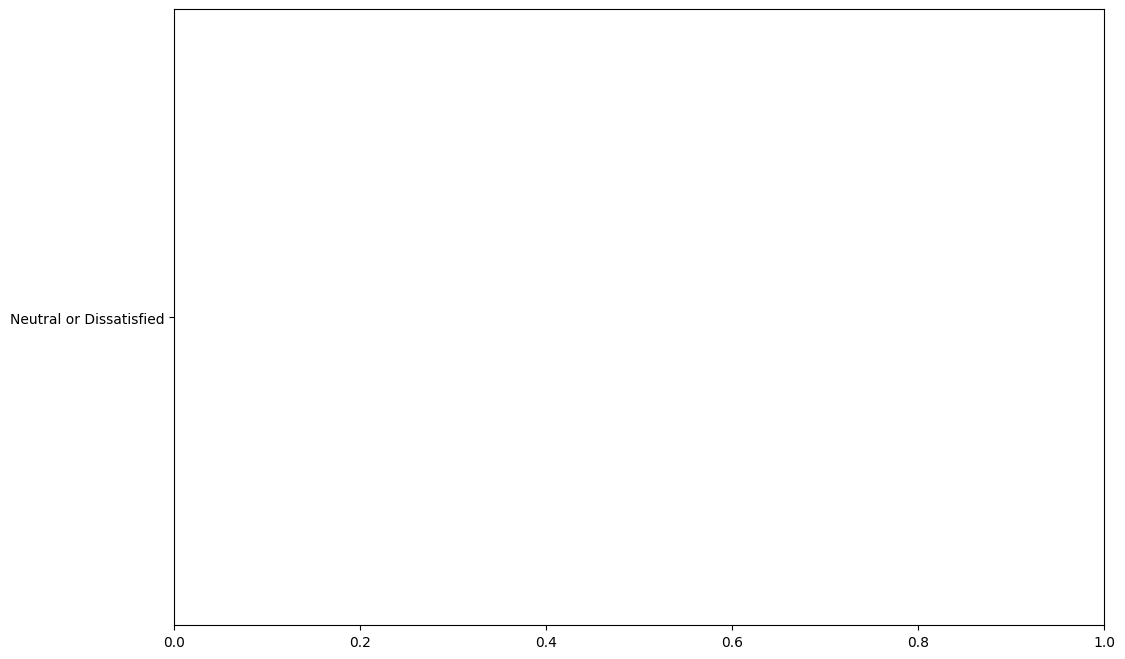

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing 'Age' or 'Satisfaction'
data_clean = data.dropna(subset=['Age', 'Satisfaction'])

# Plotting the scatter plot with a trend line
plt.figure(figsize=(12, 8))
sns.barplot(x='Age', y='Satisfaction', data=data_clean, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Customer Satisfaction Varies with Age')
plt.xlabel('Age')
plt.ylabel('Satisfaction')
plt.show()


**ANSWER NUMBER 2**  
Average Flight Distances Under Different Classes

In [ ]:
flight_distance = data.groupby('Class')['Flight Distance'].mean().reset_index()
max_avg_distance = flight_distance['Flight Distance'].max()
min_avg_distance = flight_distance['Flight Distance'].min()

print(f"Maximum average flight distance: {max_avg_distance}")
print(f"Minimum average flight distance: {min_avg_distance}")
print(flight_distance)


Maximum average flight distance: 1643.2381503447612
Minimum average flight distance: 599.4231889333819
          Class  Flight Distance
0      Business      1643.238150
1       Economy       599.423189
2  Economy Plus       620.673967


ANSWER NUMBER 3   
Does Type of Travel Affect Customer Satisfaction

**bold text**

In [ ]:

missing_values = data[['Type of Travel', 'Satisfaction']].isnull().sum()
print(missing_values)

data_clean = data.dropna(subset=['Type of Travel', 'Satisfaction'])


Type of Travel    0
Satisfaction      0
dtype: int64


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

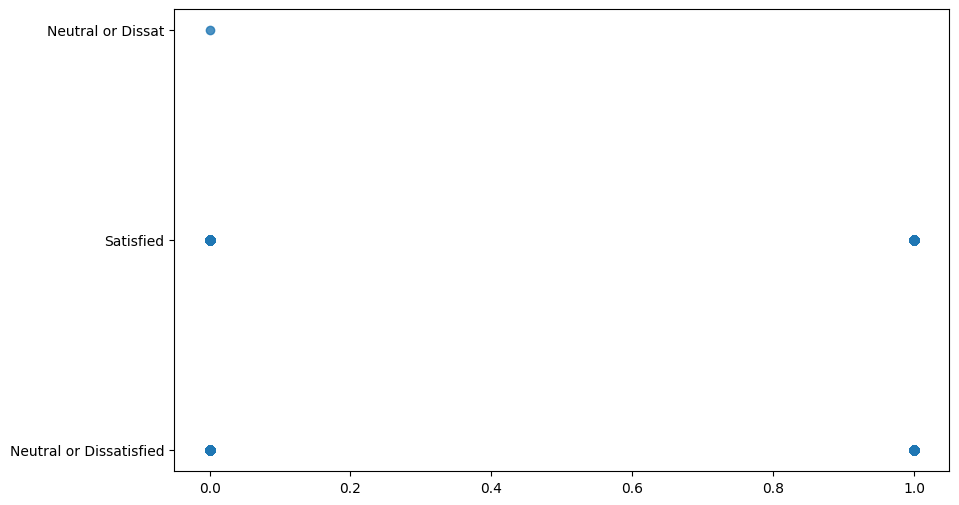

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data_clean = data.dropna(subset=['Type of Travel', 'Satisfaction'])

data_clean['Type of Travel Binary'] = data_clean['Type of Travel'].apply(lambda x: 1 if x == 'Business' else 0)


plt.figure(figsize=(10, 6))
sns.regplot(x='Type of Travel Binary', y='Satisfaction', data=data_clean, logistic=True)
plt.title('Correlation between Type of Travel and Customer Satisfaction')
plt.xlabel('Type of Travel (0 = Personal, 1 = Business)')
plt.ylabel('Customer Satisfaction')
plt.show()


**ANSWER NUMBER 4**



Impact of Gender on Wi-Fi Service Satisfaction

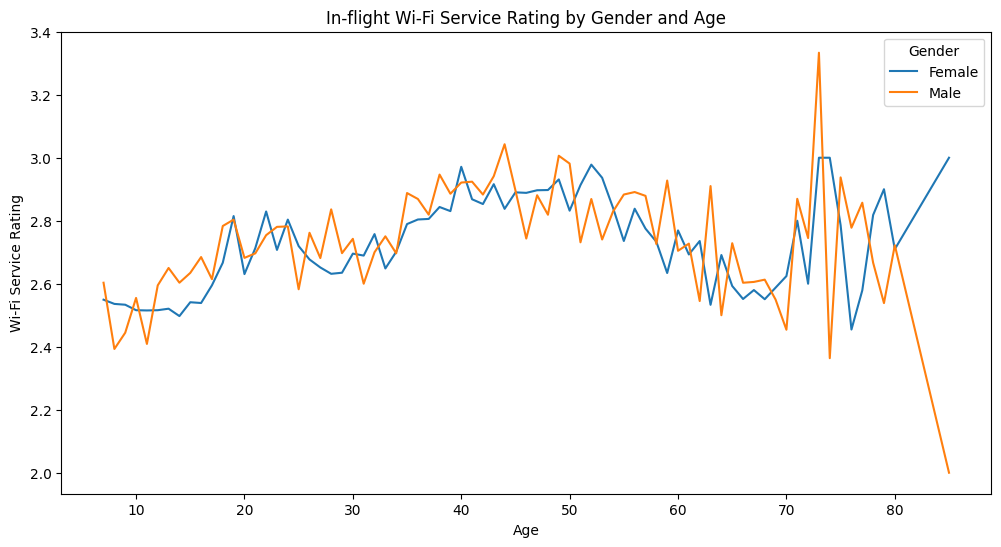

In [ ]:

wifi_gender_age = data.groupby(['Gender', 'Age'])['In-flight Wifi Service'].mean().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=wifi_gender_age, x='Age', y='In-flight Wifi Service', hue='Gender')
plt.title('In-flight Wi-Fi Service Rating by Gender and Age')
plt.xlabel('Age')
plt.ylabel('Wi-Fi Service Rating')
plt.show()


**ANSWER NUMBER 5**

Little Things Matter


In [ ]:
service_ratings = ['Food and Drink', 'In-flight Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness']
correlations = data[service_ratings].corr()

print("Correlations between cleanliness and other service ratings:")
print(correlations)


Correlations between cleanliness and other service ratings:
                   Food and Drink  In-flight Service  Seat Comfort  \
Food and Drink           1.000000          -0.013271      0.575332   
In-flight Service       -0.013271           1.000000      0.002233   
Seat Comfort             0.575332           0.002233      1.000000   
Leg Room Service        -0.006289           0.316064      0.020846   
Cleanliness              0.660309           0.024550      0.643662   

                   Leg Room Service  Cleanliness  
Food and Drink            -0.006289     0.660309  
In-flight Service          0.316064     0.024550  
Seat Comfort               0.020846     0.643662  
Leg Room Service           1.000000     0.030668  
Cleanliness                0.030668     1.000000  


UNIQUE ANALYSIS

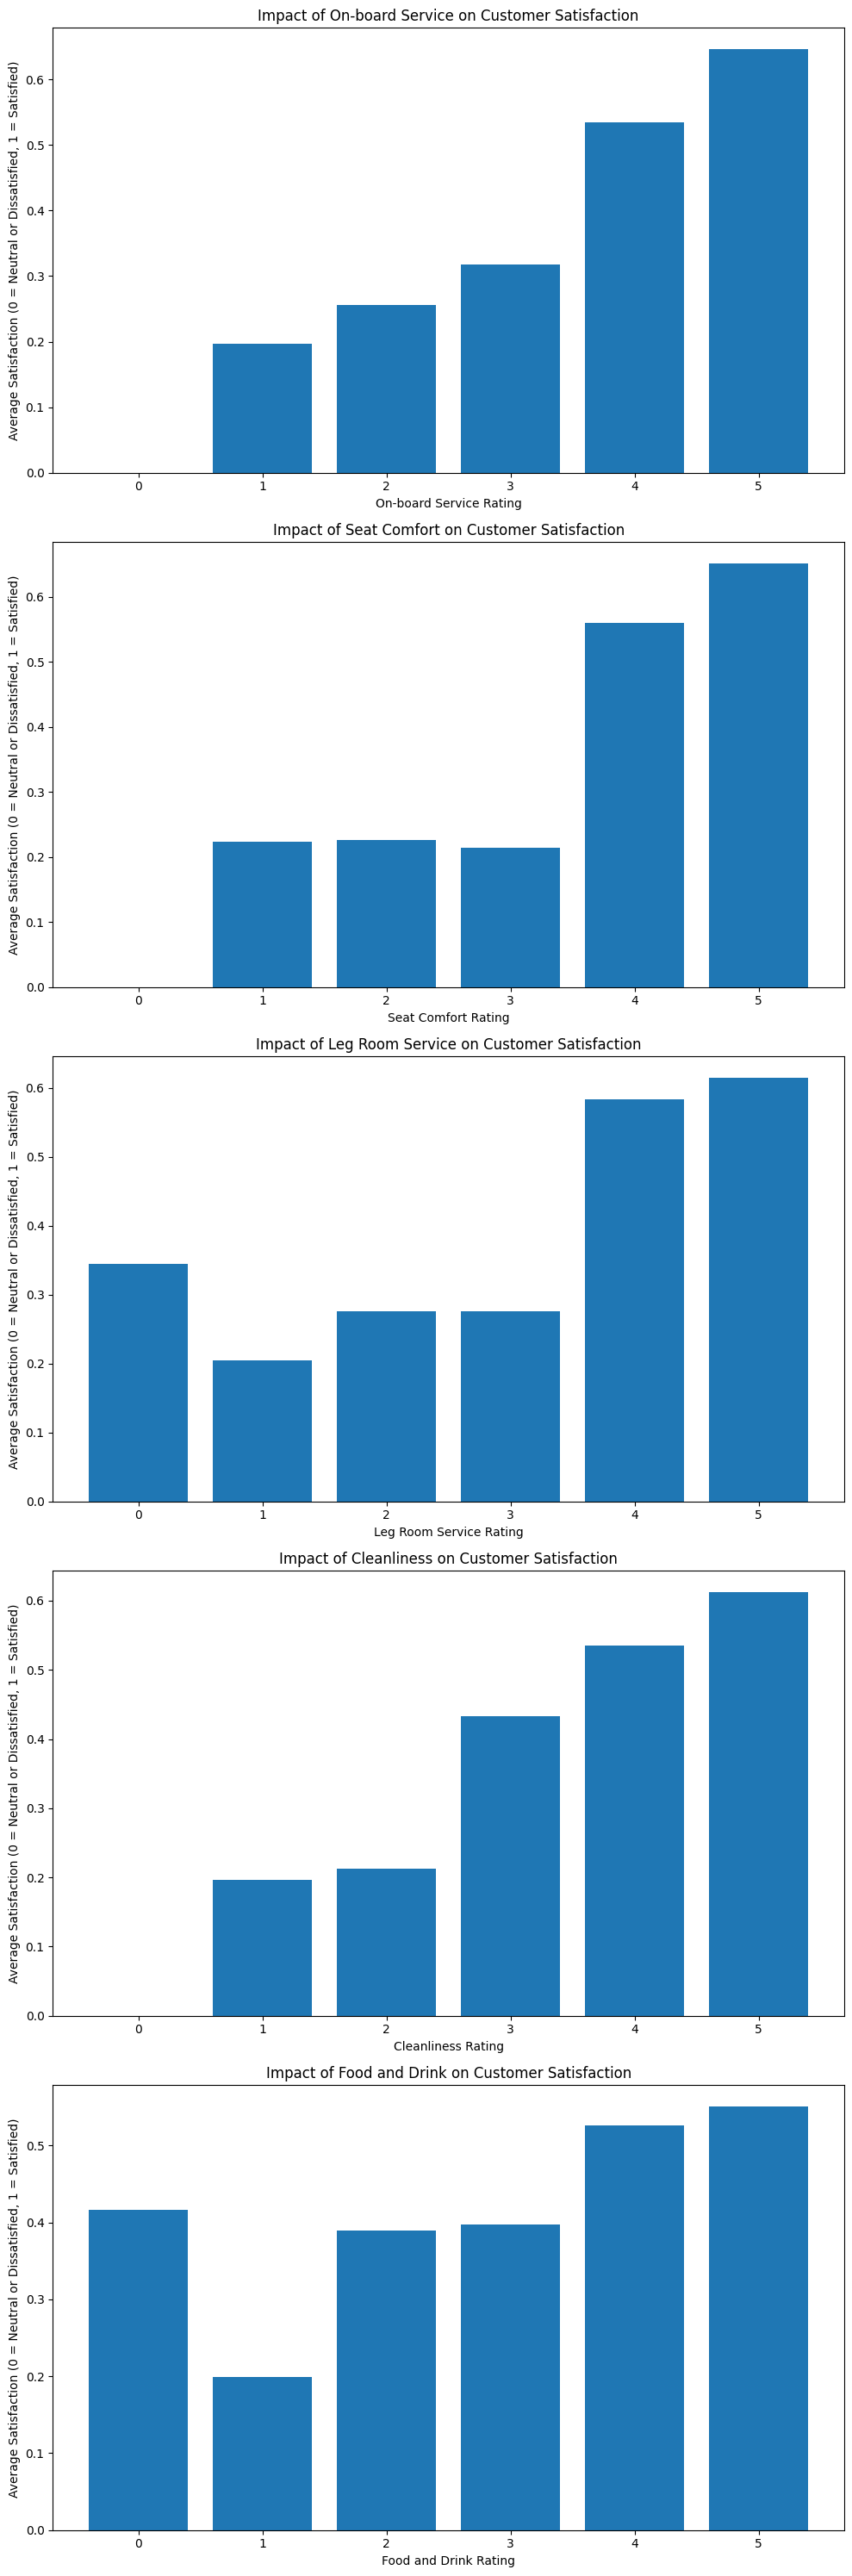

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Satisfaction_Num
0,1,Male,48,First-time,Business,Business,821,2,5,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,0
1,2,Female,35,Returning,Business,Business,821,26,39,2,...,4,5,5,3,5,2,5,5,Satisfied,1
2,3,Male,41,Returning,Business,Business,853,0,0,4,...,5,3,5,5,3,4,3,3,Satisfied,1
3,4,Male,50,Returning,Business,Business,1905,0,0,2,...,5,5,4,4,5,2,5,5,Satisfied,1
4,5,Female,49,Returning,Business,Business,3470,0,1,3,...,4,4,5,4,3,3,3,3,Satisfied,1


In [55]:
import pandas as pd
import matplotlib.pyplot as plt


airline_data = pd.read_csv('/content/Airline Quality Ratings cleaned.csv')

# Convert satisfaction to numerical values for analysis
airline_data['Satisfaction_Num'] = airline_data['Satisfaction'].map({
    'Neutral or Dissatisfied': 0,
    'Satisfied': 1
})

# Define the factors to analyze
factors = [
    'On-board Service', 'Seat Comfort', 'Leg Room Service',
    'Cleanliness', 'Food and Drink'
]

# Create subplots for visualizing the relationships
fig, axes = plt.subplots(len(factors), 1, figsize=(10, 30))

for i, factor in enumerate(factors):
    avg_satisfaction = airline_data.groupby(factor)['Satisfaction_Num'].mean()
    axes[i].bar(avg_satisfaction.index, avg_satisfaction.values)
    axes[i].set_title(f'Impact of {factor} on Customer Satisfaction')
    axes[i].set_xlabel(f'{factor} Rating')
    axes[i].set_ylabel('Average Satisfaction (0 = Neutral or Dissatisfied, 1 = Satisfied)')

plt.tight_layout()
plt.show()

airline_data.head()
